In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Polynomial regression as linear least squares

From the knowledge of a sample of pair of scalar values $\{a_i, y_i\}_{i=1}^n$, we would like to predict the relation between $x$ and $y$. One simple way to go beyond linear regression is to consider polynomial regression: for example we could try to model $y$ as a polynomial of degree 3 of $a$. We would look for $(x_0, x_1, x_2, x_3) \in \mathbb{R}^4$ such that the values $a_i$ and $y_i$ are linked as $y_i \simeq x_0 + x_1 a_i + x_2 a_i^2$.

This problem can be mapped to linear regression by considering that we have for each $a$ a feature vectors of dimension $d + 1$ when considering the fit of a polynomial of degree $d$. This feature vector is $(1, a, a^2, \cdots, a^d)$. Such that the full data matrix is
$$
    A = \left[\begin{matrix}
    1 & a_1 & \cdots & a_1^d \\
    1 & a_2 & \cdots & a_2^d \\ 
    \vdots & \vdots & \vdots & \vdots \\
    1 & a_n & \cdots & a_n^d
\end{matrix} \right] \in \mathbb{R}^{n \times (d+1)}.
$$

As a exercise below we will consider data that was created from a polynomial of dimension 3, to which noise is added. Assuming that we do not know the degree of the generated polynomial, we will try to fit with $d = 5$ and $d=2$ and investigate ridge regression.  

In [43]:
## Helper functions to setup the problem
def get_data_mat(a, deg):
    """
    Inputs:
    a: (np.array of size N)
    deg: (int) max degree used to generate the data matrix
    
    Returns:
    A: (np.array of size N x (deg_true + 1)) data matrix
    """
    A = np.array([a ** i for i in range(deg + 1)]).T
    return A

def draw_sample(deg_true, x, N, eps=0):
    """
    Inputs:
    deg_true: (int) degree of the polynomial g
    a: (np.array of size deg_true) parameter of g
    N: (int) size of sample to draw
    eps: noise level
    
    Returns:
    x: (np.array of size N)
    y: (np.array of size N)
    """    
    a = np.sort(np.random.rand(N))
    A = get_data_mat(a, deg_true)
    y = A @ x + eps * np.random.randn(N)
    return a, y


**(a)** Complete the three functions below to obtain 
- the least square estimator $x^{LS}$
- the ridge estimator $x^{Ridge}$
- the mean square error $\lVert A x - y \rVert^2 / n$

In [44]:
def least_square_estimator(A, y):
    # multiples more penrose psudo inverse times y and returns the vector result. 
    return np.dot(np.linalg.pinv(A),y.T)


def ridge_estimator(A, y, lbd):
    #applies ridge regression esimtator
    temp=(A.T@A+lbd*np.identity(len(A[0])))
    return np.linalg.inv(temp)@A.T@y



def mean_squared_error(x, A, y):
    ## x here are our learned weights. 
    return np.mean((A @ x - y) ** 2)

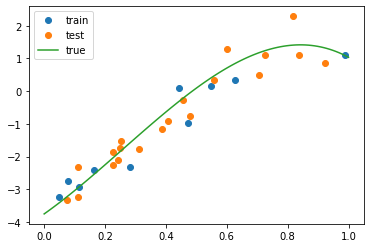

In [45]:
# This cells generates the data - for your submission do not change it. 
# But for your own curiosity, do not hesistate to investigate what is going on when changing the properties of the data :) 

np.random.seed(45) # fixing seed so everyone should see the same data
N = 10
deg_true = 3 # degree of true polynomial
eps = 0.5 # noise amplitude
x_true = np.array([-3.75307359,  6.58178662,  6.23070014, -8.02457871])

# radom input data
a_tr, y_tr = draw_sample(deg_true, x_true, N, eps=eps) # training data
a_te, y_te = draw_sample(deg_true, x_true, 2 * N, eps=eps) # testing data

a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true)
plt.plot(a_tr, y_tr,'o', label='train')
plt.plot(a_te, y_te,'o', label='test')
plt.plot(a_plot, A_plot @ x_true,'-', label='true')
plt.legend()

**(b)** Complete the code below to visualize the prediction of $x^{LS}$ and $x^{Ridge}$ for $\lambda$ in $[1e-7, 0.1, 1]$, using in all cases a prediction model of degree 5. The output of the cell should be a plot as above, where you added three lines of predictions for all values of $a \in [0,1]$: line LS, line ridge $\lambda = 1e-7$, line ridge $\lambda = 0.1$, line ridge $\lambda = 1$.

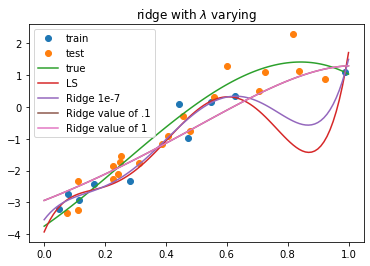

In [46]:
fig1, ax1 = plt.subplots()
a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true)
ax1.plot(a_tr, y_tr,'o', label='train')
ax1.plot(a_te, y_te,'o', label='test')
ax1.plot(a_plot, A_plot @ x_true,'-', label='true')
deg_pred = 5

A_tr = get_data_mat(a_tr, deg_pred)
A_te = get_data_mat(a_te, deg_pred)

x_ls = x_ls =least_square_estimator(A_tr,y_tr)

A_plot = get_data_mat(a_plot, deg_pred)
plt.plot(a_plot, A_plot @ x_ls, label='LS')
ridge_runs=[]
for lbd in [1e-7, 0.1, 1]:
   ridge_runs.append(ridge_estimator(A_tr, y_tr, lbd))
ax1.plot(a_plot, A_plot @ ridge_runs[0], label='Ridge 1e-7')
ax1.set_title("ridge with $\lambda$ varying")
ax1.plot(a_plot, A_plot @ ridge_runs[1], label='Ridge value of .1')
ax1.plot(a_plot, A_plot @ ridge_runs[1], label='Ridge value of 1')
ax1.legend()



**(c)** Use the `mean_squared_error` to make a plot of the training error and the test error as a function of $\lambda$ as we have seen in the lecture (range given below). Which value of $\lambda$ would you choose? Does that align with your intuition from the plots above?

the smallest test mse was observed at lambda=0.0005994842503189409


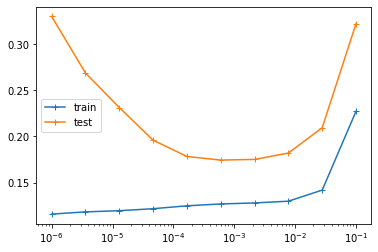

In [47]:
tr_mse = []
te_mse = []
lbds = np.logspace(-6, -1, 10)
for lbd in lbds:
    x_train=ridge_estimator(A_tr, y_tr, lbd)
    tr_mse.append(mean_squared_error(x_train, A_tr,y_tr))
    te_mse.append(mean_squared_error(x_train, A_te,y_te))

plt.plot(lbds, tr_mse, '-+', label='train')
plt.plot(lbds, te_mse,'-+', label='test')
plt.xscale('log')
plt.legend()
print("the smallest test mse was observed at lambda={0}".format([y for (x,y) in zip(te_mse,lbds) if(x==min(te_mse))][0]))

- yes this does line up with my understanding of the above graphs as it seems like a small but non zero value of lambda does increase the model fit looking at the orignal graphs


**(d)** For the optimal value of $\lambda$ compare $x^{LS}$, $x^{Ridge}$ and $x^{true}$.   


Mean squared error for least squared was: 1.3661968396725381
Mean squared erorr for ridge was : 0.17434847905256895
true mean squared error was : 0.17797817950144962


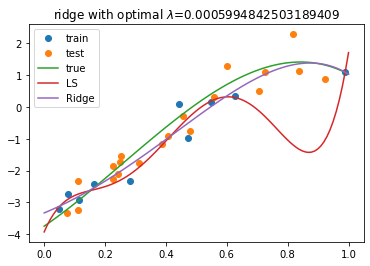

In [48]:
fig1, ax1 = plt.subplots()
a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true)
ax1.plot(a_tr, y_tr,'o', label='train')
ax1.plot(a_te, y_te,'o', label='test')
ax1.plot(a_plot, A_plot @ x_true,'-', label='true')
deg_pred = 5

A_tr = get_data_mat(a_tr, deg_pred)
A_te = get_data_mat(a_te, deg_pred)

x_ls = x_ls =least_square_estimator(A_tr,y_tr)

A_plot = get_data_mat(a_plot, deg_pred)
plt.plot(a_plot, A_plot @ x_ls, label='LS')
ridge_runs=[]
ridge_runs.append(ridge_estimator(A_tr, y_tr, [y for (x,y) in zip(te_mse,lbds) if(x==min(te_mse))][0]))
ax1.plot(a_plot, A_plot @ ridge_runs[0], label='Ridge')
ax1.set_title("ridge with optimal $\lambda$={}".format([y for (x,y) in zip(te_mse,lbds) if(x==min(te_mse))][0]))
ax1.legend()
print('Mean squared error for least squared was: {}'.format(mean_squared_error(x_ls, A_te, y_te)))
print('Mean squared erorr for ridge was : {}'.format(mean_squared_error(ridge_runs[0], A_te, y_te)))
print('true mean squared error was : {}'.format(mean_squared_error(x_true, get_data_mat(a_te,deg_true), y_te)))

(e) Repeat the same operation with a fitting model of degree 2 (`deg_pred=2`). What are your findings related to the optimal degree of regularizations in this case? 

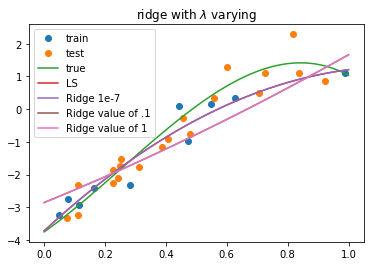

In [49]:
fig1, ax1 = plt.subplots()
a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true)
ax1.plot(a_tr, y_tr,'o', label='train')
ax1.plot(a_te, y_te,'o', label='test')
ax1.plot(a_plot, A_plot @ x_true,'-', label='true')
deg_pred = 2

A_tr = get_data_mat(a_tr, deg_pred)
A_te = get_data_mat(a_te, deg_pred)

x_ls = x_ls =least_square_estimator(A_tr,y_tr)

A_plot = get_data_mat(a_plot, deg_pred)
plt.plot(a_plot, A_plot @ x_ls, label='LS')
ridge_runs=[]
for lbd in [1e-7, 0.1, 1]:
   ridge_runs.append(ridge_estimator(A_tr, y_tr, lbd))
ax1.plot(a_plot, A_plot @ ridge_runs[0], label='Ridge 1e-7')
ax1.set_title("ridge with $\lambda$ varying".format(1e-7))
ax1.plot(a_plot, A_plot @ ridge_runs[1], label='Ridge value of .1')
ax1.plot(a_plot, A_plot @ ridge_runs[1], label='Ridge value of 1')
ax1.legend()



the smallest test mse was observed at lambda=1e-06


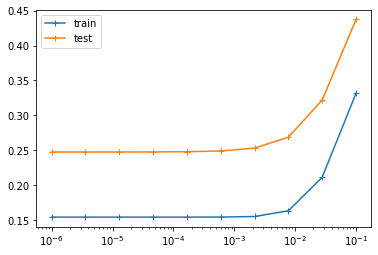

In [50]:
tr_mse = []
te_mse = []
lbds = np.logspace(-6, -1, 10)
for lbd in lbds:
    x_train=ridge_estimator(A_tr, y_tr, lbd)
    tr_mse.append(mean_squared_error(x_train, A_tr,y_tr))
    te_mse.append(mean_squared_error(x_train, A_te,y_te))

plt.plot(lbds, tr_mse, '-+', label='train')
plt.plot(lbds, te_mse,'-+', label='test')
plt.xscale('log')
plt.legend()
print("the smallest test mse was observed at lambda={0}".format([y for (x,y) in zip(te_mse,lbds) if(x==min(te_mse))][0]))

this also makes sense as it seems that the training and test data are similar so adding any form of regularization will increase bias and thus cuase underfitting. 

Mean squared error for least squared was: 1.3661968396725381
Mean squared erorr for ridge was : 0.3299822587226938
true mean squared error was : 0.17797817950144962


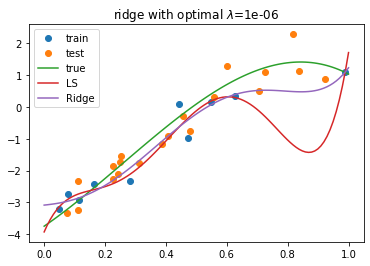

In [51]:
fig1, ax1 = plt.subplots()
a_plot = np.linspace(0, 1, 100)
A_plot = get_data_mat(a_plot, deg_true)
ax1.plot(a_tr, y_tr,'o', label='train')
ax1.plot(a_te, y_te,'o', label='test')
ax1.plot(a_plot, A_plot @ x_true,'-', label='true')
deg_pred = 5

A_tr = get_data_mat(a_tr, deg_pred)
A_te = get_data_mat(a_te, deg_pred)

x_ls = x_ls =least_square_estimator(A_tr,y_tr)

A_plot = get_data_mat(a_plot, deg_pred)
plt.plot(a_plot, A_plot @ x_ls, label='LS')
ridge_runs=[]
ridge_runs.append(ridge_estimator(A_tr, y_tr, [y for (x,y) in zip(te_mse,lbds) if(x==min(te_mse))][0]))
ax1.plot(a_plot, A_plot @ ridge_runs[0], label='Ridge')
ax1.set_title("ridge with optimal $\lambda$={}".format([y for (x,y) in zip(te_mse,lbds) if(x==min(te_mse))][0]))
ax1.legend()
print('Mean squared error for least squared was: {}'.format(mean_squared_error(x_ls, A_te, y_te)))
print('Mean squared erorr for ridge was : {}'.format(mean_squared_error(ridge_runs[0], A_te, y_te)))
print('true mean squared error was : {}'.format(mean_squared_error(x_true, get_data_mat(a_te,deg_true), y_te)))
